In [85]:
from scipy import misc
from skimage.filters import threshold_otsu
import os
import numpy as np
from skimage import color
import numpy as np
from skimage import data
from matplotlib import pyplot as plt
lstrowtest=[]
#changing test set to binary images and summing the row and col to create histograms

for i in os.listdir("/Users/adamjankelow/documents/python/TEST/"):
    if i == ".DS_Store" :
        print("ignore")
    else:
        k = misc.imread("/Users/adamjankelow/documents/python/TEST/"+i)
        GrayScale = color.rgb2gray(k)
        thresh = threshold_otsu(GrayScale)
        GrayScale[GrayScale<thresh]=0
        GrayScale[GrayScale>thresh]=1
        # changing grayscale to binary
        Binary =GrayScale[0:2400, 0:2400] #cropping square images
        
        row = Binary.sum(axis=1, dtype=None, out=None, keepdims=False)
        lstrowtest.append(row) #lstrowtest is the row histograms of the test set

ignore


IOError: [Errno 21] Is a directory: '/Users/adamjankelow/documents/python/TEST/correct'

In [86]:
lstrowtrain=[]
#changing training set to binary images and summing the row and col to create histograms
for i in os.listdir("/Users/adamjankelow/documents/python/TRAIN/"):
    if i == ".DS_Store" :
        print("ignore")
    else:
        m = misc.imread("/Users/adamjankelow/documents/python/TRAIN/"+i)
        n = color.rgb2gray(m)
        thresh = threshold_otsu(n)
        n[n<thresh]=0
        n[n>thresh]=1
        Binary2 =n[0:2400, 0:2400]#cropping square images
        # changing grayscale to binary
        
        row = Binary2.sum(axis=1, dtype=None, out=None, keepdims=False) 
        lstrowtrain.append(row) #lstrowtrain is the row histograms of the test set


ignore


IOError: [Errno 21] Is a directory: '/Users/adamjankelow/documents/python/TRAIN/correct'

In [7]:
# function used in k nearest neighbor
import math
def euclideanDistance(instance1, instance2, length):
	distance = 0
	for x in range(length):
		distance += pow((instance1[x] - instance2[x]), 2)
	return math.sqrt(distance)

In [8]:
#PCA reduction ( 20 dimension gives most accurate results for this data set)

In [72]:
#PCA train is the traning set that has had PCA reduction
from sklearn.decomposition import PCA as sklearnPCA
sklearn_pcatr = sklearnPCA(n_components=(20))
PCAtrain = sklearn_pcatr.fit_transform(lstrowtrain)

In [73]:

sklearn_pcate = sklearnPCA(n_components=20)
PCAtest = sklearn_pcate.fit_transform(lstrowtest)

In [74]:
print(PCAtrain[1])

[-975.37849978  752.03571091 -511.19978086 -637.59975819 -186.5276224
   95.79301797 -277.39031479 -125.54995193  -80.85761266 -145.69433175
  -14.72911634 -349.63311595 -143.09619097   22.98349441  102.66796423
   34.17316696 -297.3635597   -55.5022786   132.5369556    85.52174717]


In [75]:
xt=[]
yt=[]
zt=[]
zf=[]
xf=[]
yf=[]
cnt=0
for i in PCAtrain:
    if cnt%2== 0:
        xt.append(i[0])
        yt.append(i[1])
        #zt.append(i[2])
    else: 
        xf.append(i[0])
        yf.append(i[1])
        #zf.append(i[2])
    cnt+=1

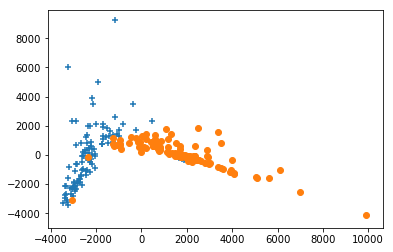

In [76]:
plt.scatter(xt, yt, marker="+")
plt.scatter(xf, yf,marker="o")
plt.show()

In [77]:
# changing training set from a numpy array to normal list

TrainingSet=[]
for RowSum in PCAtrain:
    RowSumlst = RowSum.tolist()
  
    TrainingSet.append(RowSumlst)

In [78]:
#changing test set from numpy array to list 
TestSet=[]
 
for Rowsum in PCAtest: 
    Rowsumlst = Rowsum.tolist()

    TestSet.append(Rowsumlst)



In [79]:
count=0
for image in TrainingSet:
    if (count+1)%2== 0:
        image.append("no")
    else:
        image.append("yes")
    count+= 1
  
    if count == len(TrainingSet):
        break
    
#TrainingSet is PCAtrain converted to normal list with yes and no appended

In [80]:
print(TrainingSet[5])

[-961.7236013218862, 766.4742508137698, -391.5403335726582, -561.8242013857804, -90.85156315788934, 70.92304941779892, -86.41636414957406, 130.4965663076037, -94.22978101520158, -21.03403557022741, -124.7185865239618, -55.041675113468415, 117.83460762382153, -35.0564665376286, -167.94640535423403, -301.99138821505903, -135.41708316558032, -31.366869380891288, -124.3298648273152, 115.26144840869323, 'no']


In [81]:
# get neighbours returns the k nearest neighbors of the image in the test set
import operator 
def getNeighbors(trainingSet, testInstance, k):
	distances = []
	length = len(testInstance)-1
	for x in range(len(trainingSet)):
		dist = euclideanDistance(testInstance, trainingSet[x], length)
		distances.append((trainingSet[x], dist))
	distances.sort(key=operator.itemgetter(1))
	neighbors = []
	for x in range(k):
		neighbors.append(distances[x][0])
	return neighbors

In [82]:
# using k nearest neighbors to predict response of test data


responselst=[]
for image in TestSet:
    yes=0
    no=0
    trainSet = TrainingSet
    testInstance = image
    k = 3
    neighbors = getNeighbors(trainSet, testInstance, k)
    
    for neighbor in neighbors:
        if (neighbor[-1])== "yes":
            yes+=1
        else:
            no+=1
            
    if yes> no:
        responselst.append("yes")
    else:
        responselst.append("no")
print(responselst)
print()
print(CorrectResponse)



['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'yes', 'no', 'yes', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no', 'no']
()
['yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'no', 'yes', 'n

In [83]:
# CorrectResponse is list of the correct responses for the test set
CorrectResponse =[]
count= 0
for i in TestSet:
    if (count+1)%2== 0:
        CorrectResponse.append("no")
    else:
        CorrectResponse.append("yes")
    count+= 1
    
  
    if count == len(TestSet):
        break    
        
        
        


In [409]:
#rotating images which are predicted to be the wrong way round, either right way up or upside down and storing them in 
#directory called reults
from scipy import ndimage
import scipy.misc
cn=0
rotated=[]
#for i in os.listdir("/Users/adamjankelow/documents/python/TEST/"):
    #if i == ".DS_Store" :
        #print("ignore")
    #else:
for i in os.listdir("/Users/adamjankelow/documents/python/TEST/"):
    k = misc.imread("/Users/adamjankelow/documents/python/TEST/"+i)
    if responselst[cn]== "no":
        rotate_face = ndimage.rotate(k, 270)
        scipy.misc.imsave("/Users/adamjankelow/documents/python/results/"+i, rotate_face)
    else:
        scipy.misc.imsave("/Users/adamjankelow/documents/python/results/"+i, k)
    cn+=1
        

In [84]:
# accuracy test for predicted results (84% is currently the highest)
count=0
Correct=0
Wrong=0

for i in CorrectResponse:
    #print(prd[con] + ' ' + responselst[con] + '\n')
    if CorrectResponse[count] is responselst[count]:
        Correct+=1
    else:
        Wrong+=1
    count+=1
    

print((Correct/float(len(TestSet))) * 100.0)



81.7073170732


In [20]:
# determining the most suitable dimension for PCA reduction 
lis=[]
for a in range(20,40):
    
    sklearn_pcatr = sklearnPCA(n_components=(a))
    PCAtrain = sklearn_pcatr.fit_transform(lstrowtrain)
    
    sklearn_pcate = sklearnPCA(n_components=a)
    PCAtest = sklearn_pcate.fit_transform(lstrowtest)
    
    count = 0
    new=[]
    for k in PCAtrain:
        b = PCAtrain[count].tolist()
        count+=1
        new.append(b)
    
    count= 0
    newtest=[] 
    for c in PCAtest: 
        b = PCAtest[count].tolist()
        count+=1
        newtest.append(b)
        
    count=0
    for d in new:
        if (count+1)%2== 0:
            new[count].append("no")
        else:
            new[count].append("yes")
        count+= 1
        if count == len(new):
            break
        
    cnt=0

    responselst=[]
    for e in newtest:
        yes=0
        no=0
        trainSet = new
        testInstance = newtest[cnt]
        k = 3
        neighbors = getNeighbors(trainSet, testInstance, k)
        cnt+= 1 
        for neighbor in neighbors:
            if (neighbor[-1])== "yes":
                yes+=1
            else:
                no+=1
            
            if yes> no:
                responselst.append("yes")
            else:
                responselst.append("no")
    con=0
    yay=0
    ah=0
    for f in prd:
        if prd[con] is responselst[con]:
            yay+=1
        else:
            ah+=1
        con+=1
        
    lis.append((yay/float(len(newtest))) * 100.0)
    lis.append(a)
    
    
max(lis)
    

    
                                           
                                           




63.41463414634146

In [21]:
print(lis)

[63.41463414634146, 20, 60.97560975609756, 21, 62.19512195121951, 22, 59.756097560975604, 23, 63.41463414634146, 24, 60.97560975609756, 25, 63.41463414634146, 26, 60.97560975609756, 27, 62.19512195121951, 28, 58.536585365853654, 29, 62.19512195121951, 30, 59.756097560975604, 31, 60.97560975609756, 32, 58.536585365853654, 33, 59.756097560975604, 34, 63.41463414634146, 35, 62.19512195121951, 36, 59.756097560975604, 37, 58.536585365853654, 38, 60.97560975609756, 39]
